(792, 4)
(52, 4)


Text(0.5, 0, 'Z轴')

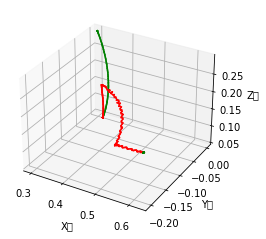

In [2]:
import pandas as pd
import numpy as np

from pathlib import Path
from datetime import datetime
import os

import glob

import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore", category=UserWarning)

def data_processing(state, delt, gripper_change_delt):
    p = state[0,:]
    delete_line = []
    for i in range(1,state.shape[0]):
        distance = np.sum(np.square(p[:3]-state[i][:3]))  
        gripper_change = abs(p[3]-state[i][3])
        
        if(gripper_change <= gripper_change_delt and distance < delt):
            delete_line.append(i)
        else:
            p = state[i]
    processed_data = np.delete(state,delete_line,0)
    return processed_data

# 创建三维图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', label = 'test')

# 绘制轨迹线
# ax.plot(x, y, z, marker='o', markersize=1)


# 绘制标准轨迹
data = pd.read_csv("/home/lsy/Projects/kinova-imitation-learning/imitation_learning/v2/expert_data2/simulated_rule/new_hole_optimize2/data1.csv", header=None)
state = data.iloc[0].to_numpy()
npstate = np.array([np.fromstring(item[1:-1], sep=' ')
                for item in state])  # 将state变为(?, 4)的格式，一行代表一个state
print(npstate.shape)
delt = 5e-6
gripper_change_delt = 0.03/(0.36635616+0.000087572115)
newstate=data_processing(npstate, delt, gripper_change_delt)
print(newstate.shape)
x = npstate[:, 0]
y = npstate[:, 1]
z = npstate[:, 2]
a = npstate[:, 3]

colors = np.where(a < 0.01, 'green', np.where(a > 0.3, 'red', 'black'))
for i in range(1, len(x)):
    ax.plot([x[i - 1], x[i]], [y[i - 1], y[i]], [z[i - 1], z[i]], c=colors[i], markersize=4)


# 设置坐标轴标签
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_zlabel('Z轴')


